<a href="https://colab.research.google.com/github/taru4u3/NeuralNetzwerk/blob/main/Cancer_classification_Over_fitting_problem_resolved_with_earlystopping_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('./cancer_classification.csv')

In [ ]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df['benign_0__mal_1'].value_counts()

1    357
0    212
Name: benign_0__mal_1, dtype: int64

In [ ]:
df.isnull().sum() # no nulls in data

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

<Axes: >

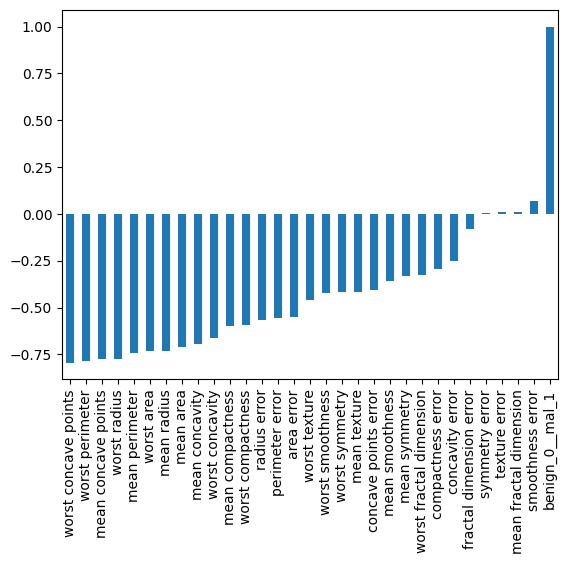

In [3]:
# Let us check the correlation between different features and our label, better is to plot and go in discussion with business
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

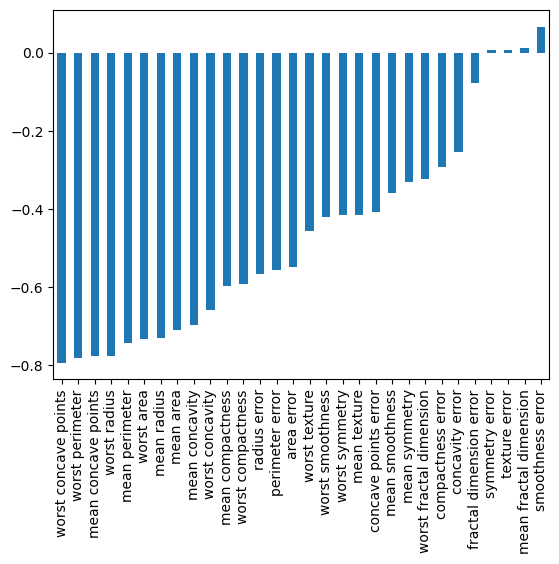

In [4]:
# Let us remove the label from above plot
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

What we see from above is many features have -ve correlation with our label, so the model should work good for us

<Axes: xlabel='benign_0__mal_1', ylabel='smoothness error'>

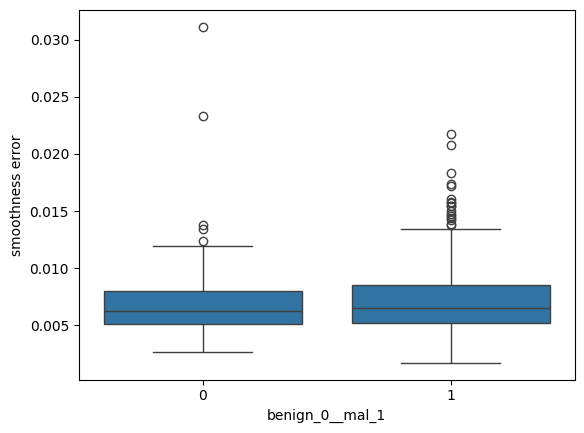

In [ ]:
sns.boxplot(x='benign_0__mal_1',y='smoothness error', data=df)

As we dont have any null values, or any non numeric features, so we dont need explicit feature engineering . Let us begin with data splitting and Modelling

In [5]:
# use .values to convert DF into array as needed by NN
X= df.drop('benign_0__mal_1',axis=1).values
y= df['benign_0__mal_1'].values

In [ ]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

Let us scale the data using minmax scaler. Note only the training data should be fitted not test data. test data shld only be transformed

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
X_train = scaler.fit_transform(X_train,y_train)

In [11]:
X_test = scaler.transform(X_test)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [13]:
model = Sequential()
model.add(Dense(30,activation='relu')) # 30 features hence input layer = 30
model.add(Dense(15,activation='relu')) # hidden layer = 15 to keep it small
model.add(Dense(1,activation = 'sigmoid')) # output layer , sigmoid so that we get the probability of cancer being in one class over other. Like logistic regression problem
model.compile(optimizer='adam', loss='binary_crossentropy')

In [14]:
model.fit(X_train,y_train,epochs = 600, validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 2s 20ms/step - loss: 0.6910 - val_loss: 0.6703
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6498 - val_loss: 0.6357
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6119 - val_loss: 0.5939
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5697 - val_loss: 0.5462
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5237 - val_loss: 0.4966
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4750 - val_loss: 0.4460
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4294 - val_loss: 0.4053
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3834 - val_loss: 0.3558
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3469 - val_loss: 0.3226
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3135 - val_loss: 0.2850
Epoch 11

In [15]:
loss= pd.DataFrame(model.history.history)

In [16]:
loss.head()

,loss,val_loss
0,0.691019,0.670339
1,0.649752,0.635723
2,0.611858,0.593885
3,0.569712,0.546238
4,0.523691,0.496621


<Axes: >

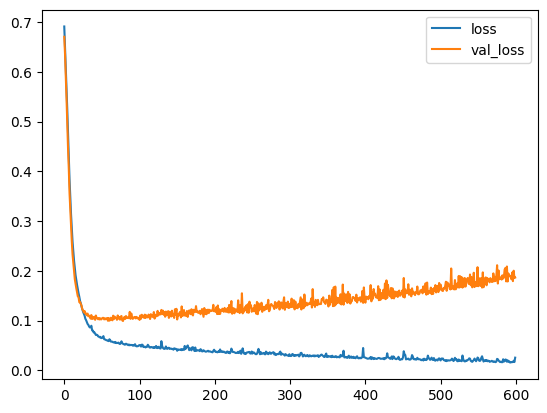

In [17]:
loss.plot()

As you can see from above graph that the loss func reduces which is on training data but the validation loss increases which is on test data. This indicates we have overfitting problem the model will do good on known data but bad on unknown data. So we have two approaches to deal with this
1. Early stopping: stop training as soon as the validation loss begin to increase with early stopping
2. Dropout

Method 1 : Avoiding overfitting with early stopping

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',patience=25)
# the parameters indicuate we want to monitor and minimize validation_loss and patience indicates as soon as the loss begins to increase stop it after 25 epochs

Note it is very important to initialise the model again before using the fit with early stopping.

In [21]:
model = Sequential()
model.add(Dense(30,activation='relu')) # 30 features hence input layer = 30
model.add(Dense(15,activation='relu')) # hidden layer = 15 to keep it small
model.add(Dense(1,activation = 'sigmoid')) # output layer , sigmoid so that we get the probability of cancer being in one class over other. Like logistic regression problem
model.compile(optimizer='adam', loss='binary_crossentropy')

EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False, start_from_epoch=0)
 |  
Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  

In [22]:
model.fit(x=X_train,y=y_train,epochs = 600, validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 17ms/step - loss: 0.6754 - val_loss: 0.6543
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6465 - val_loss: 0.6208
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6117 - val_loss: 0.5804
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5715 - val_loss: 0.5347
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5245 - val_loss: 0.4845
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4752 - val_loss: 0.4354
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4282 - val_loss: 0.3885
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3849 - val_loss: 0.3445
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3471 - val_loss: 0.3073
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3135 - val_loss: 0.2777
Epoch 11

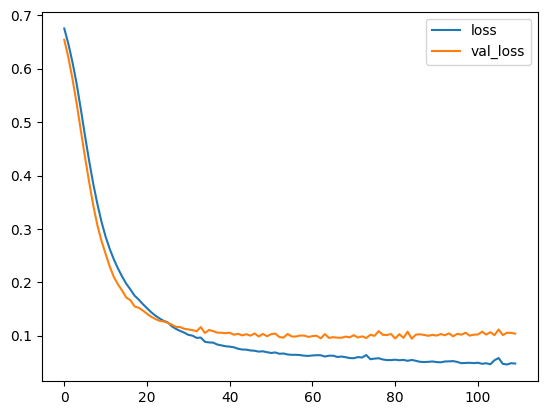

In [23]:
loss = pd.DataFrame(model.history.history).plot()

What we see from above diagram is that the overfitting problem is to the extent resolved but remains little bit, the validation loss is slightly higher than actual loss.
Now let us use other approach Dropout in combination with early stopping

Method 2 : Dropout

In [28]:
#help(Dropout)
# It takes parameter rate i.e., Float between 0 and 1, which indicates Fraction of the input units or neurons to drop.0 meaning no neurons drop and 1 meaning all neurons drop. So select something in between

Let us initialise the model again this time with dropout layer

In [31]:
model = Sequential()
model.add(Dense(30,activation='relu')) # 30 features hence input layer = 30
model.add(Dropout(0.5)) # dropping 50 % of neuros from input layer
model.add(Dense(15,activation='relu')) # hidden layer = 15 to keep it small
model.add(Dropout(0.5)) # dropping 50 % of neuros from hidden layer
model.add(Dense(1,activation = 'sigmoid')) # output layer , sigmoid so that we get the probability of cancer being in one class over other. Like logistic regression problem
model.compile(optimizer='adam', loss='binary_crossentropy')

Let us use the above in addition to earlystopping

In [32]:
model.fit(x=X_train,y=y_train,epochs = 600, validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 17ms/step - loss: 0.7296 - val_loss: 0.6717
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.7034 - val_loss: 0.6515
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6547 - val_loss: 0.6323
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6553 - val_loss: 0.6094
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6313 - val_loss: 0.5841
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6100 - val_loss: 0.5569
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5867 - val_loss: 0.5244
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5451 - val_loss: 0.4914
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5266 - val_loss: 0.4587
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4911 - val_loss: 0.4287
Epoch 11

In [33]:
loss = pd.DataFrame(model.history.history)

<Axes: >

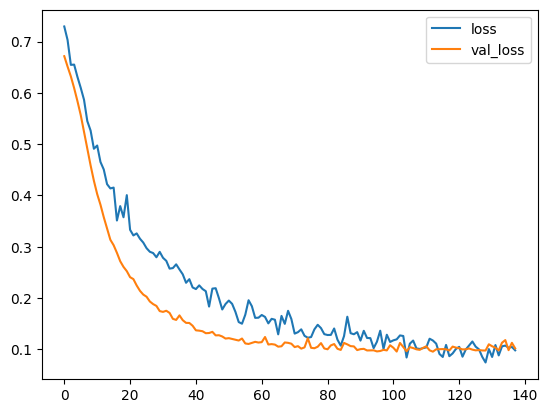

In [34]:
loss.plot()

The best model with zero overfitting, rather validation test performs better than test set as validation loss is under main loss and then coincides.

Now let us evaluate our model goodness.On hand predictions and real data

In [35]:
prediction_class = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [36]:
prediction_class

array([[9.87557650e-01],
       [9.87529635e-01],
       [9.92902160e-01],
       [1.04766469e-02],
       [9.99199212e-01],
       [9.99334157e-01],
       [9.99830306e-01],
       [1.29265231e-06],
       [9.96047854e-01],
       [9.98481572e-01],
       [1.54035899e-03],
       [9.93357956e-01],
       [9.74437833e-01],
       [9.98560607e-01],
       [1.19863928e-03],
       [9.99124169e-01],
       [9.90732133e-01],
       [9.99648750e-01],
       [4.98014879e-06],
       [4.43486013e-02],
       [9.72243488e-01],
       [9.95302856e-01],
       [9.86893773e-01],
       [9.99285936e-01],
       [3.17563256e-03],
       [9.28131223e-01],
       [2.85864662e-04],
       [9.99954760e-01],
       [2.85389746e-04],
       [2.82191625e-03],
       [3.03166687e-01],
       [2.24822480e-03],
       [5.83822608e-01],
       [1.36859640e-01],
       [9.99392211e-01],
       [9.99680340e-01],
       [1.03695029e-02],
       [1.91389583e-02],
       [1.32049783e-04],
       [2.38485222e-06],


In [38]:
# as you see above is not binary result due to sigmoid func, so we need to explicitly make it binary outcome with threshold , all below 0.5 is marked as 0 and >0.5 is marked as 1
predictions = (model.predict(X_test)>0.5).astype('int32')

5/5 [==============================] - 0s 3ms/step


In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [43]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]


THis is a very good result as our model has given 99 % accuracy